# Regression to predict house prices (20 points)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Load data

In [2]:
#do not modify this cell
housing=pd.read_csv('boston_housing_missing_values.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,NaN,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,NaN,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,NaN,0.0,2.18,0.0,0.458,7.147,NaN,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Handle missing values (4 points)
for each column of the hoursing data, replace the missing values by the average of the valid values in that column \
do NOT use SimpleImputer in sk-learn, otherwise you get zero points

In [3]:
#show the total number of missing values in the dataframe housing
housing.isnull().sum().sum()

696

In [4]:
#handle missing values in housing
#for each column of the housing data, replace the missing values by the average of the valid values in that column  
housing.fillna(housing.mean(), inplace=True)

In [5]:
#show the total number of missing values in the dataframe housing
housing.isnull().sum().sum()

0

### Split the dataset

In [6]:
#do not change this cell
#split the dataset into a training set and a test set, using train_test_split
#20% go to the test set
#set random_state to 0
X = housing.iloc[:,:-1].values # house features
Y = housing.iloc[:,-1].values # house prices
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
#make sure it is numpy array
type(X_train)

numpy.ndarray

In [8]:
X_train.shape

(404, 13)

In [9]:
Y_train.shape

(404,)

In [10]:
X_test.shape

(102, 13)

In [11]:
Y_test.shape

(102,)

### Apply KNeighborsRegressor (5 points)

In [12]:
#create a param_grid
param_grid = np.arange(1, 92, step=10)
param_grid

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [13]:
#use GridSearchCV to find the best model via five-fold cross-validation
#the mse loss is used for regression
#use the right value for 'scoring' - read https://scikit-learn.org/1.5/modules/model_evaluation.html 
#code to create a GridSearchCV object for KNeighborsRegressor:
grid_search = GridSearchCV(KNeighborsRegressor(), [{'n_neighbors': param_grid}], cv=5, scoring='neg_mean_squared_error')

In [14]:
#run/fit GridSearchCV
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])}],
             scoring='neg_mean_squared_error')

In [15]:
#show the optimal value of the parameter 
grid_search.best_params_

{'n_neighbors': 11}

In [16]:
#obtain the best model from GridSearchCV
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=11)

In [17]:
#use the best model to make predictions on the test set
#measure MSE, MAE, and MAPE
Y_test_pred = grid_search.predict(X_test)
MSE = np.mean((Y_test_pred - Y_test) ** 2)
MAE = np.mean(np.abs(Y_test_pred - Y_test))
MAPE = np.mean(np.abs(Y_test_pred - Y_test) / Y_test)
print(f'MSE {MSE}\nMAE {MAE}\nMAPE {MAPE}')

MSE 56.51365045705639
MAE 4.854181455365734
MAPE 0.21339015134916892


Text(0.5, 1.0, 'KNeighborsRegressor')

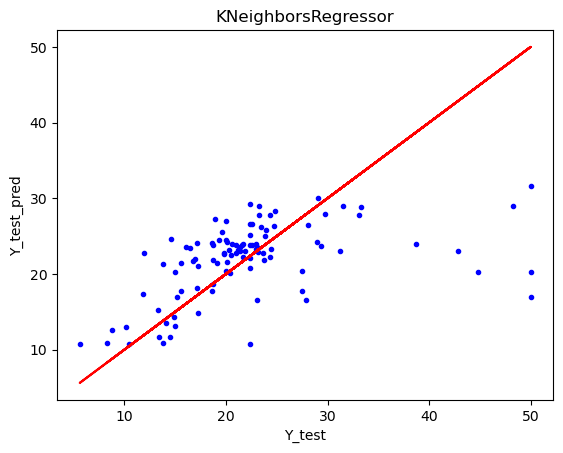

In [18]:
# plot the 45-degree line and the predicted data points
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_test_pred, color='blue', marker='.')
ax.plot(Y_test, Y_test, color='red')
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')
ax.set_title('KNeighborsRegressor')

### Apply DecisionTreeRegressor (5 points)

In [19]:
#create a param_grid
param_grid1 = {'max_depth': np.arange(1, 92, step=10)}
param_grid1

{'max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])}

In [20]:
#use GridSearchCV to find the best model via five-fold cross-validation
#the mse loss is used for regression
#use the right value for 'scoring' - read https://scikit-learn.org/1.5/modules/model_evaluation.html 
#code to create a GridSearchCV object for DecisionTreeRegressor: 
grid_search1 = GridSearchCV(DecisionTreeRegressor(), param_grid1, cv=5, scoring='neg_mean_squared_error')

In [21]:
#run/fit GridSearchCV
grid_search1.fit(X_train, Y_train)

/Users/ariandjahed/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             scoring='neg_mean_squared_error')

In [22]:
#show the optimal value of the parameter
grid_search1.best_params_

{'max_depth': 51}

In [23]:
#obtain the best model from GridSearchCV
grid_search1.best_estimator_

DecisionTreeRegressor(max_depth=51)

In [24]:
#apply the best model on the test set
#measure MSE, MAE, and MAPE
Y_test_pred1 = grid_search1.predict(X_test)
MSE1 = np.mean((Y_test_pred1 - Y_test) ** 2)
MAE1 = np.mean(np.abs(Y_test_pred1 - Y_test))
MAPE1 = np.mean(np.abs(Y_test_pred1 - Y_test) / Y_test)
print(f'MSE {MSE}\nMAE {MAE}\nMAPE {MAPE}')

MSE 56.51365045705639
MAE 4.854181455365734
MAPE 0.21339015134916892


Text(0.5, 1.0, 'DecisionTreeRegressor')

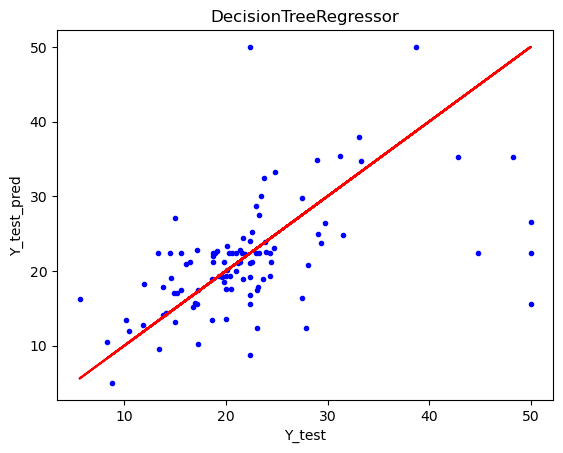

In [25]:
# plot the 45-degree line and the predicted data points
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_test_pred1, color='blue', marker='.')
ax.plot(Y_test, Y_test, color='red')
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')
ax.set_title('DecisionTreeRegressor')

### Apply RandomForestRegressor (5 points)

In [26]:
#create a param_grid
param_grid2 = {'max_depth': np.arange(1, 22, step=2)}
param_grid2

{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])}

In [27]:
#use GridSearchCV to find the best model via five-fold cross-validation
#the mse loss is used for regression
#use the right value for 'scoring' - read https://scikit-learn.org/1.5/modules/model_evaluation.html 
#code to create a GridSearchCV object for RandomForestRegressor: 
grid_search2 = GridSearchCV(RandomForestRegressor(), param_grid2, cv=5, scoring='neg_mean_squared_error')

In [28]:
#run/fit GridSearchCV
grid_search2.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])},
             scoring='neg_mean_squared_error')

In [29]:
#show the optimal value of the parameter
grid_search2.best_params_

{'max_depth': 7}

In [30]:
#obtain the best model from GridSearchCV
grid_search2.best_estimator_

RandomForestRegressor(max_depth=7)

In [31]:
#apply the best model on the test set
#measure MSE, MAE, and MAPE
Y_test_pred2 = grid_search2.predict(X_test)
MSE2 = np.mean((Y_test_pred2 - Y_test) ** 2)
MAE2 = np.mean(np.abs(Y_test_pred2 - Y_test))
MAPE2 = np.mean(np.abs(Y_test_pred2 - Y_test) / Y_test)
print(f'MSE {MSE}\nMAE {MAE}\nMAPE {MAPE}')

MSE 56.51365045705639
MAE 4.854181455365734
MAPE 0.21339015134916892


Text(0.5, 1.0, 'RandomForestRegressor')

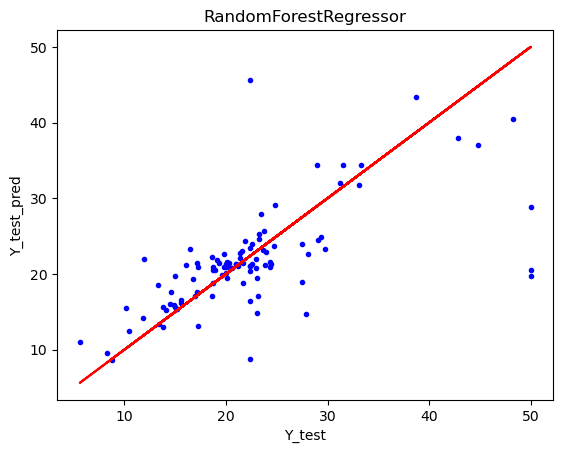

In [32]:
# plot the 45-degree line and the predicted data points
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_test_pred2, color='blue', marker='.')
ax.plot(Y_test, Y_test, color='red')
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')
ax.set_title('RandomForestRegressor')

### Summary (1 point)

In [33]:
#summerize the results in a panda dataframe
#do not manually enter the numbers into the table, use variables in the above cells
array = np.array([
    ['KNN', MSE, MAE, MAPE],
    ['Decision Tree', MSE1, MAE1, MAPE1],
    ['Random Forest', MSE2, MAE2, MAPE2]
])
table = pd.DataFrame(array, columns=['Model', 'MSE', 'MAE', 'MAPE'])
table

,Model,MSE,MAE,MAPE
0,KNN,56.51365045705639,4.854181455365734,0.21339015134916892
1,Decision Tree,62.76325790747813,5.088794898490369,0.2300008501419492
2,Random Forest,41.481628577752915,3.682162417924714,0.16102626768794814
